In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-and-anxiety-data/depression_anxiety_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/depression-and-anxiety-data/depression_anxiety_data.csv')

In [3]:
df.shape

(783, 19)

In [4]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [5]:
df.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of       id  school_year  age  gender        bmi          who_bmi  phq_score  \
0      1            1   19    male  33.333333  Class I Obesity          9   
1      2            1   18    male  19.841270           Normal          8   
2      3            1   19    male  25.102391       Overweight          8   
3      4            1   18  female  23.738662           Normal         19   
4      5            1   18    male  25.617284       Overweight          6   
..   ...          ...  ...     ...        ...              ...        ...   
778  779            4   24  female  21.096191           Normal          6   
779  780            4   22    male  25.308642       Overweight          4   
780  781            4   22    male  22.720438           Normal          2   
781  782            4   22  female  23.033168           Normal         17   
782  783            4   22    male  22.598140           Normal          6   

    depression_severity depressiveness suic

In [7]:
df.describe()

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,775.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.376774
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,3.996443
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.500000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


In [8]:
df.groupby('gender')[['depressiveness', 'suicidal']].mean()

,depressiveness,suicidal
gender,,
female,0.305211,0.086849
male,0.233422,0.08971


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df[['age', 'depressiveness']].corr()

,age,depressiveness
age,1.000000,-0.039712
depressiveness,-0.039712,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df['gender'].value_counts()

gender
female    403
male      380
Name: count, dtype: int64

In [14]:
df.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,783.0,392.000000,226.176922,1.0,196.50000,392.000000,587.500000,783.000000
school_year,783.0,2.277139,1.163633,1.0,1.00000,2.000000,3.000000,4.000000
age,783.0,20.233716,1.767217,18.0,19.00000,20.000000,21.000000,31.000000
bmi,783.0,23.420533,4.563630,0.0,20.98942,23.140496,25.519924,54.552668
phq_score,783.0,7.123883,4.426580,0.0,4.00000,6.000000,9.000000,24.000000
gad_score,783.0,6.810983,4.727352,0.0,3.00000,6.000000,9.000000,21.000000
epworth_score,775.0,6.376774,3.996443,0.0,3.50000,6.000000,9.000000,32.000000


# #Data Cleaning and Handling Missing Values


In [16]:
df.fillna(method='ffill', inplace=True)

<ipython-input-16-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-16-e9443599d05e>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method='ffill', inplace=True)


In [17]:
df.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [18]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [19]:
df = df.drop_duplicates()

In [20]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})  # Binary encoding for gender

In [21]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness             bool
suicidal                   bool
depression_diagnosis       bool
depression_treatment       bool
gad_score                 int64
anxiety_severity         object
anxiousness                bool
anxiety_diagnosis          bool
anxiety_treatment          bool
epworth_score           float64
sleepiness                 bool
dtype: object

In [22]:
df['who_bmi'] = df['who_bmi'].map({'Normal': 0, 'Overweight': 1, 'Class I Obesity': 2})

In [23]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                 float64
phq_score                 int64
depression_severity      object
depressiveness             bool
suicidal                   bool
depression_diagnosis       bool
depression_treatment       bool
gad_score                 int64
anxiety_severity         object
anxiousness                bool
anxiety_diagnosis          bool
anxiety_treatment          bool
epworth_score           float64
sleepiness                 bool
dtype: object

In [27]:
bool_cols = ['depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment',
             'anxiety_diagnosis', 'anxiety_treatment','anxiousness', 'sleepiness']
df[bool_cols] = df[bool_cols].astype(int)

In [28]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                 float64
phq_score                 int64
depression_severity      object
depressiveness            int64
suicidal                  int64
depression_diagnosis      int64
depression_treatment      int64
gad_score                 int64
anxiety_severity         object
anxiousness               int64
anxiety_diagnosis         int64
anxiety_treatment         int64
epworth_score           float64
sleepiness                int64
dtype: object

In [29]:
# Fill missing values
df['depression_severity'].fillna(df['depression_severity'].mode()[0], inplace=True)
df['depressiveness'].fillna('False', inplace=True)
df['suicidal'].fillna('False', inplace=True)
df['depression_diagnosis'].fillna('False', inplace=True)
df['depression_treatment'].fillna('False', inplace=True)
df['anxiousness'].fillna('False', inplace=True)
df['anxiety_diagnosis'].fillna('False', inplace=True)
df['anxiety_treatment'].fillna('False', inplace=True)
df['epworth_score'].fillna(df['epworth_score'].median(), inplace=True)
df['sleepiness'].fillna('False', inplace=True)


<ipython-input-29-cda1729bbada>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depression_severity'].fillna(df['depression_severity'].mode()[0], inplace=True)
<ipython-input-29-cda1729bbada>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [30]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                 float64
phq_score                 int64
depression_severity      object
depressiveness            int64
suicidal                  int64
depression_diagnosis      int64
depression_treatment      int64
gad_score                 int64
anxiety_severity         object
anxiousness               int64
anxiety_diagnosis         int64
anxiety_treatment         int64
epworth_score           float64
sleepiness                int64
dtype: object

In [34]:
df['anxiety_severity'].unique()

array(['Moderate', 'Mild', 'Severe', 'None-minimal', '0'], dtype=object)

In [35]:
df['anxiety_severity'] = df['anxiety_severity'].map({'Moderate': 4, 'Mild': 1, 'Severe': 2, 'None-minimal':3})

In [36]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                 float64
phq_score                 int64
depression_severity      object
depressiveness            int64
suicidal                  int64
depression_diagnosis      int64
depression_treatment      int64
gad_score                 int64
anxiety_severity        float64
anxiousness               int64
anxiety_diagnosis         int64
anxiety_treatment         int64
epworth_score           float64
sleepiness                int64
dtype: object

In [37]:
df['depression_severity'].unique()

array(['Mild', 'Moderately severe', 'None-minimal', 'Moderate', 'Severe',
       'none'], dtype=object)

In [38]:
df['depression_severity'] = df['depression_severity'].map({'Moderately severe': 4, 'Mild': 1, 'None-minimal': 2, 'Moderate':3,'Severe':5,'none':0})

In [40]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                    int64
bmi                     float64
who_bmi                 float64
phq_score                 int64
depression_severity       int64
depressiveness            int64
suicidal                  int64
depression_diagnosis      int64
depression_treatment      int64
gad_score                 int64
anxiety_severity        float64
anxiousness               int64
anxiety_diagnosis         int64
anxiety_treatment         int64
epworth_score           float64
sleepiness                int64
dtype: object

In [41]:
df['depression_severity'].fillna(df['depression_severity'].mode()[0], inplace=True)
df['depressiveness'].fillna('False', inplace=True)
df['suicidal'].fillna('False', inplace=True)
df['depression_diagnosis'].fillna('False', inplace=True)
df['depression_treatment'].fillna('False', inplace=True)
df['anxiousness'].fillna('False', inplace=True)
df['anxiety_diagnosis'].fillna('False', inplace=True)
df['anxiety_treatment'].fillna('False', inplace=True)
df['epworth_score'].fillna(df['epworth_score'].median(), inplace=True)
df['sleepiness'].fillna('False', inplace=True)

<ipython-input-41-d1406b68a759>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depression_severity'].fillna(df['depression_severity'].mode()[0], inplace=True)
<ipython-input-41-d1406b68a759>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

#  Normalization (for Continuous Variables)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['bmi', 'phq_score', 'gad_score', 'epworth_score']] = scaler.fit_transform(df[['bmi', 'phq_score', 'gad_score', 'epworth_score']])


# Exploratory Data Analysis (EDA)

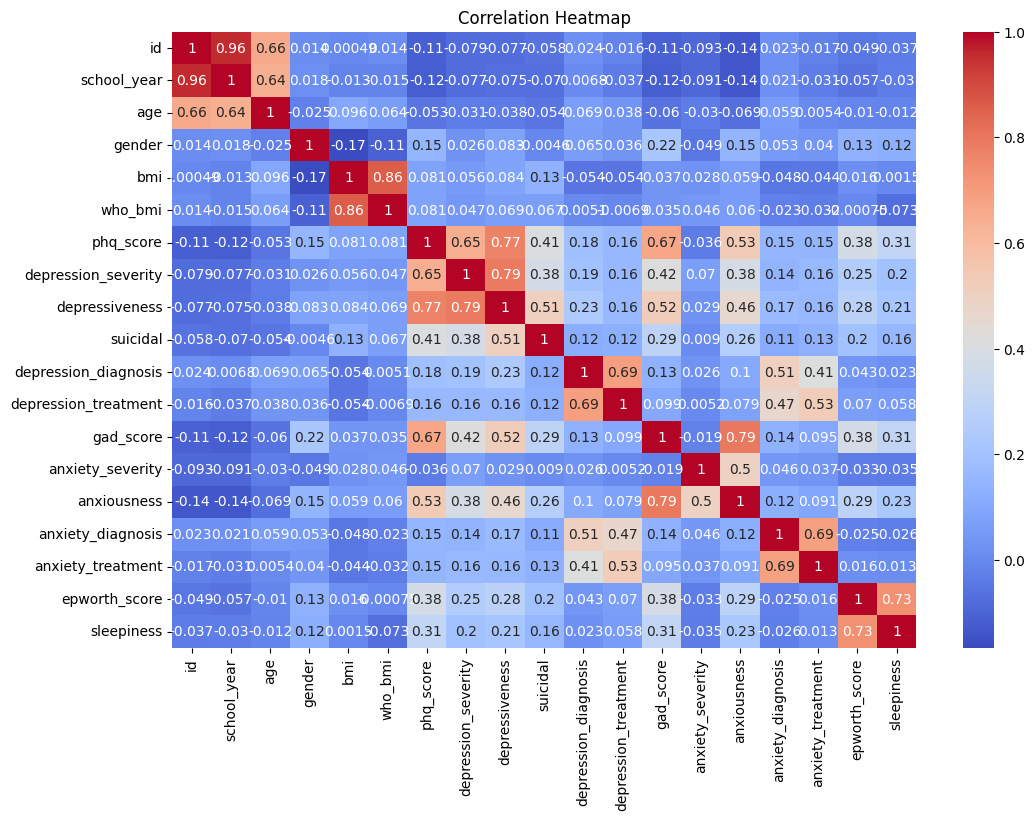

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 # Feature Engineering

In [44]:
# Encode categorical features
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['who_bmi'] = df['who_bmi'].map({'Normal': 0, 'Overweight': 1, 'Class I Obesity': 2})

# Create a new feature: Mental Health Risk Score
df['mental_health_risk'] = df['phq_score'] + df['gad_score']


In [46]:
df.isnull().sum()

id                        0
school_year               0
age                       0
gender                  783
bmi                       0
who_bmi                 783
phq_score                 0
depression_severity       0
depressiveness            0
suicidal                  0
depression_diagnosis      0
depression_treatment      0
gad_score                 0
anxiety_severity          6
anxiousness               0
anxiety_diagnosis         0
anxiety_treatment         0
epworth_score             0
sleepiness                0
mental_health_risk        0
dtype: int64

In [47]:
df.shape

(783, 20)

In [56]:
df=df.drop(['gender'],axis=1)

In [57]:
df.isnull().sum()

id                        0
school_year               0
age                       0
bmi                       0
who_bmi                 783
phq_score                 0
depression_severity       0
depressiveness            0
suicidal                  0
depression_diagnosis      0
depression_treatment      0
gad_score                 0
anxiety_severity          6
anxiousness               0
anxiety_diagnosis         0
anxiety_treatment         0
epworth_score             0
sleepiness                0
mental_health_risk        0
dtype: int64

In [58]:
df=df.drop(['who_bmi'],axis=1)

In [59]:
df.isnull().sum()

id                      0
school_year             0
age                     0
bmi                     0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        6
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
mental_health_risk      0
dtype: int64

# Feature Selection

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['depression_diagnosis'], axis=1)  # Assuming 'depression_diagnosis' is the target
y = df['depression_diagnosis'].astype(int)  # Convert target to integer (0/1)

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
print("Selected features:\n", X.columns[selector.get_support()])


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['depression_diagnosis'], axis=1)  # Assuming 'depression_diagnosis' is the target
y = df['depression_diagnosis'].astype(int)  # Ensure target is integer (0/1)

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

# Data Preparation & Splitting

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Handle missing values and standardize numerical columns (already done in the previous steps)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
num_cols = ['bmi', 'phq_score', 'gad_score', 'epworth_score']
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['depression_severity', 'anxiety_severity', 'depressiveness', 'suicidal',
            'depression_diagnosis', 'depression_treatment', 'anxiousness', 
            'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Standardize the numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical labels for multi-class prediction (combining depression and anxiety)
df['mental_health_condition'] = df['depression_diagnosis'].astype(str) + '_' + df['anxiety_diagnosis'].astype(str)
encoder = LabelEncoder()
df['condition_label'] = encoder.fit_transform(df['mental_health_condition'])

# Split the dataset into training and test sets
X = df.drop(['condition_label', 'mental_health_condition', 'depression_diagnosis', 'anxiety_diagnosis'], axis=1)
y = df['condition_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and Compare Models (Logistic Regression, Random Forest, XGBoost)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Initialize models
log_reg = LogisticRegression(multi_class='ovr', max_iter=500)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Evaluate models on the test set
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       143
           1       0.00      0.00      0.00         2
           2       0.33      0.20      0.25         5
           3       0.67      0.57      0.62         7

    accuracy                           0.92       157
   macro avg       0.49      0.44      0.46       157
weighted avg       0.91      0.92      0.91       157

Accuracy: 0.9235668789808917

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       143
           1       0.33      0.50      0.40         2
           2       0.50      0.40      0.44         5
           3       0.75      0.43      0.55         7

    accuracy                           0.93       157
   macro avg       0.64      0.58      0.59       157
weighted avg       0.93      0.93      0.93       157

Accuracy: 0.9299363057324841

--- XGBoost ---
    

In [67]:
from sklearn.metrics import roc_auc_score
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC for {name}: {roc_auc:.4f}")


ROC-AUC for Logistic Regression: 0.7949
ROC-AUC for Random Forest: 0.8211
ROC-AUC for XGBoost: 0.7881
